In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape the data to (num_samples, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9093 - loss: 0.3084 - val_accuracy: 0.9847 - val_loss: 0.0535
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9842 - loss: 0.0494 - val_accuracy: 0.9890 - val_loss: 0.0401
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9917 - val_loss: 0.0337
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9897 - val_loss: 0.0369
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.9890 - val_loss: 0.0420


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0432
Test accuracy: 0.9902


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class for the first test image: 7


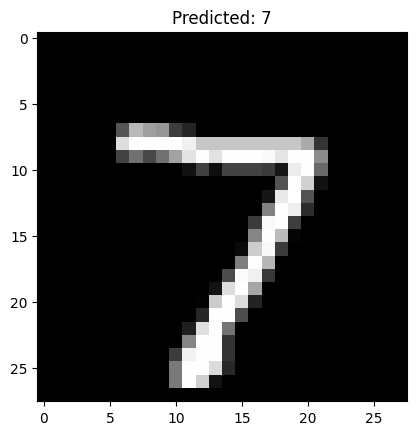

In [16]:
predictions = model.predict(x_test)

# To predict the class of the first test sample
predicted_class = np.argmax(predictions[0])
print(f"Predicted class for the first test image: {predicted_class}")

# Visualize the first test image and its predicted class
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.show()
